AssertionError: axis must be a MultiIndex

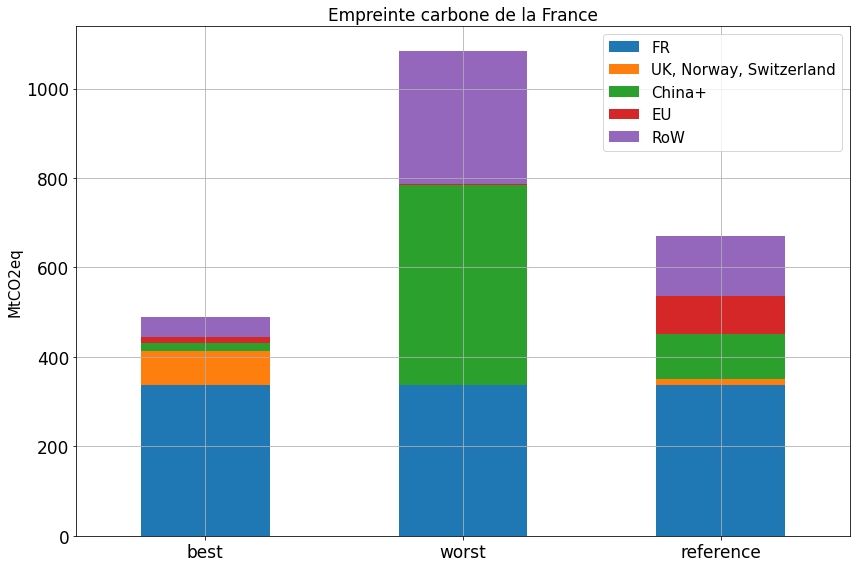

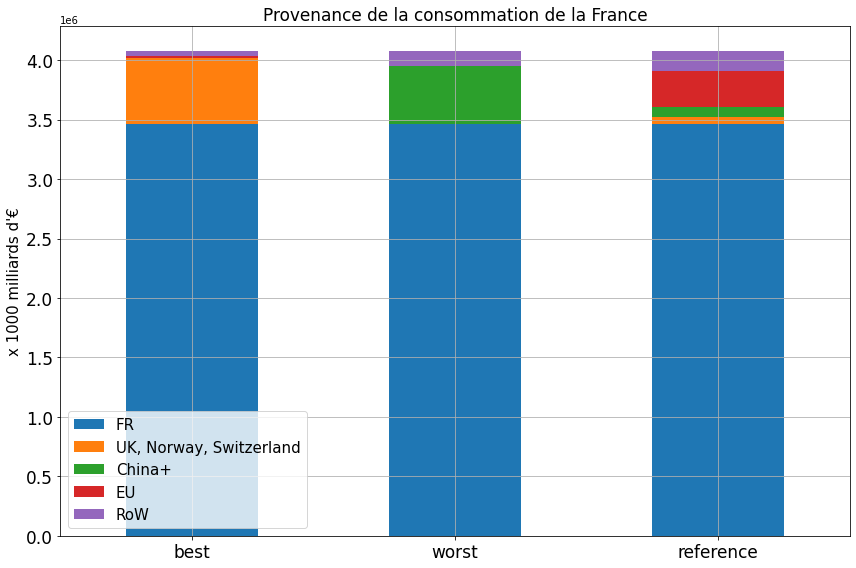

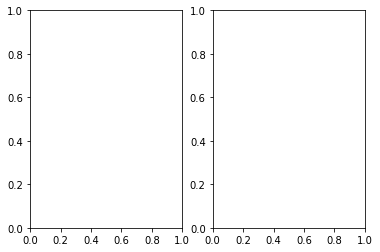

In [8]:
from model import Model
from settings import REGIONS_AGG, SECTORS_AGG
from scenarios import DICT_SCENARIOS

reference = Model(2015, "pxp", "opti_S", regions_mapper = REGIONS_AGG, sectors_mapper = SECTORS_AGG)
reference.new_counterfactual("best", DICT_SCENARIOS["best"])
reference.new_counterfactual("worst", DICT_SCENARIOS["worst"])
reference.compare_scenarios()


In [ ]:
reference.compare_scenarios()

In [6]:
reference.database.ghg_emissions_desag.D_cba["FR"].sum(axis=1).sum(level=0)

84.94450927853154

In [3]:
reference.database.Y

region                                                               FR  \
category                    Final consumption expenditure by households   
region sector                                                             
FR     Agriculture                                         18664.359021   
       Crude coal                                              4.878455   
       Crude oil                                               0.000000   
       Natural gas                                          8925.814612   
       Extractive industry                                     0.000000   
...                                                                 ...   
EU     Electronics                                          2582.035121   
       Fossil fuels                                         2859.174168   
       Electricity and heat                                    0.134793   
       Transport services                                   5406.378970   
       Composite                                           11783.200706   

region                                                                                                            \
category                    Final consumption expenditure by non-profit organisations serving households (NPISH)   
region sector                                                                                                      
FR     Agriculture                                                    0.000000                                     
       Crude coal                                                     0.000000                                     
       Crude oil                                                      0.000000                                     
       Natural gas                                                    0.000000                                     
       Extractive industry                                            0.000000                                     
...                                                                        ...                                     
EU     Electronics                                                    0.000000                                     
       Fossil fuels                                                   0.000000                                     
       Electricity and heat                                           0.000000                                     
       Transport services                                             0.000000                                     
       Composite                                                    404.224047                                     

region                                                                   \
category                    Final consumption expenditure by government   
region sector                                                             
FR     Agriculture                                             0.000000   
       Crude coal                                              0.000000   
       Crude oil                                               0.000000   
       Natural gas                                             0.000000   
       Extractive industry                                     0.000000   
...                                                                 ...   
EU     Electronics                                             0.000000   
       Fossil fuels                                            1.056205   
       Electricity and heat                                    0.000000   
       Transport services                                    812.700843   
       Composite                                            1278.394567   

region                                                     \
category                    Gross fixed capital formation   
region sector                                               
FR     Agriculture                           2.013459e+03   
       Crude coal            

In [2]:
Z = reference.database.Z

from settings import REGIONS_AGG, SECTORS_AGG

REV_SEC_AGG = {}

for key, value in SECTORS_AGG.items():
    for x in value:
        REV_SEC_AGG[x] = key
        
REV_REG_AGG = {}

for key, value in REGIONS_AGG.items():
    for x in value:
        REV_REG_AGG[x] = key

In [17]:
Z = reference.database.Z.T

index_level_0 = Z.index.get_level_values(0).drop_duplicates()
df = Z.groupby([Z.index.get_level_values(0), Z.index.get_level_values(1).map(lambda x: REV_SEC_AGG[x])]).sum().reindex(pd.Index(list(SECTORS_AGG.keys())), level=1)#.reindex(index_level_0, level=0)
df

region                                              FR              \
sector                                     Agriculture  Crude coal   
region                       sector                                  
Asia, Row Europe             Agriculture     14.842374    0.000000   
                             Energy           1.131879    0.000000   
                             Industry       171.807461    0.000000   
                             Composite       11.080694    0.000000   
Brazil, Mexico               Agriculture      6.321183    0.000000   
                             Energy           0.514736    0.000000   
                             Industry        74.730290    0.000000   
                             Composite        1.506100    0.000000   
China, RoW Asia and Pacific  Agriculture    154.543379    0.086151   
                             Energy           3.140478    1.581974   
                             Industry      1619.173246    0.972267   
                             Composite       45.296306    0.611269   
EU                           Agriculture    530.441546    0.004049   
                             Energy          17.662169    5.386892   
                             Industry      3292.005010    1.043891   
                             Composite      728.783577    0.566547   
FR                           Agriculture   9612.916532    0.283690   
                             Energy          38.864060   96.022332   
                             Industry     32950.612452   67.736616   
                             Composite      886.726803  175.362274   
Japan, Indonesia, RoW Africa Agriculture    238.241818    0.000346   
                             Energy          90.920294    0.002071   
                             Industry       625.649417    0.003595   
                             Composite      732.324352    0.001223   
RoW America,Turkey, Taïwan   Agriculture     48.574162    0.000001   
                             Energy          84.636640    0.002245   
                             Industry       353.038980    0.014425   
                             Composite       20.397314    0.000268   
RoW Middle East, Australia   Agriculture     86.705548    0.001354   
                             Energy          38.631920    0.002673   
                             Industry       656.381674    0.022387   
                             Composite      151.037396    0.010000   
South Africa                 Agriculture      0.024124    0.001747   
                             Energy           0.001434    0.227990   
                             Industry         0.599593    0.120187   
                             Composite        0.069935    0.032618   
UK, Norway, Switzerland      Agriculture     30.779348    0.000124   
                             Energy           1.107013    0.060673   
                             Industry       210.110871    0.024674   
                             Composite       50.403122    0.017911   
United States                Agriculture      9.092252    0.000000   
                             Energy           0.426907    0.000000   
                             Industry       112.810099    0.000000   
                             Composite       39.017418    0.000000   

region                                                               \
sector                                      Crude oil   Natural gas   
region                       sector                                   
Asia, Row Europe             Agriculture     0.000000  1.398685e-05   
                             Energy          0.000000  2.524080e-03   
                             Industry        0.000000  2.980528e-03   
                             Composite       0.000000  9.382575e-04   
Brazil, Mexico               Agriculture     0.000000  1.443305e-05   
                             Energy          0.000000  9.211763e-01   
                             Industry        0.000000  1.381960e-01   

In [3]:
from utils import aggregate_sum_2levels_on_axis0_level0_on_axis1, aggregate_sum_2levels_2axes, aggregate_sum
import pandas as pd

Z = reference.database.Z#ghg_emissions_desag.D_cba

#aggregate_sum(aggregate_sum_2levels_2axes(Z, pd.Index(list(REGIONS_AGG.keys())), None, REV_REG_AGG, None), 1, 0, pd.Index(list(SECTORS_AGG.keys())), REV_SEC_AGG)
#aggregate_sum(Z, 1, 0, pd.Index(list(SECTORS_AGG.keys())), REV_SEC_AGG)

aggregate_sum_2levels_on_axis0_level0_on_axis1(Z, pd.Index(list(REGIONS_AGG.keys())), pd.Index(list(SECTORS_AGG.keys())), REV_REG_AGG, REV_SEC_AGG)
#aggregate_sum_2levels_2axes(Z, pd.Index(list(REGIONS_AGG.keys())), None, REV_REG_AGG, None)

region                                FR                              \
sector                       Agriculture        Energy      Industry   
region sector                                                          
FR     Agriculture           9612.916532     38.864060  32950.612452   
       Crude coal               0.283690     96.022332     67.736616   
       Crude oil                5.079333   1493.193435     52.368569   
       Natural gas            161.664021  23712.337256   3434.531864   
       Extractive industry     87.941587     23.731337   7006.450589   
...                                  ...           ...           ...   
RoW    Electronics              0.048749     25.573142   1062.031315   
       Fossil fuels           191.888618   1221.408703   2057.075891   
       Electricity and heat     0.000000      0.000000      0.000000   
       Transport services      54.770838     64.678429   4926.037647   
       Composite              363.788216   1046.160868  12984.379585   

region                                    UK, Norway, Switzerland  \
sector                          Composite             Agriculture   
region sector                                                       
FR     Agriculture             886.726803               30.779348   
       Crude coal              175.362274                0.000124   
       Crude oil                78.525604                0.000000   
       Natural gas            2844.021613                0.000005   
       Extractive industry    1088.522832                0.517888   
...                                   ...                     ...   
RoW    Electronics             544.308126               30.994860   
       Fossil fuels            943.424178              130.855312   
       Electricity and heat      0.000000                0.464516   
       Transport services     3093.156744               17.202565   
       Composite             31498.659812              231.852541   

region                                                                \
sector                            Energy      Industry     Composite   
region sector                                                          
FR     Agriculture              1.107013    210.110871     50.403122   
       Crude coal               0.060673      0.024674      0.017911   
       Crude oil               18.697957      0.023705      0.054628   
       Natural gas              0.002790     29.050879     21.616920   
       Extractive industry      0.754476     82.657887      8.234655   
...                                  ...           ...           ...   
RoW    Electronics             56.666268   1879.579435   1649.130369   
       Fossil fuels          1361.096596   1814.717779   1269.096504   
       Electricity and heat     0.229377      2.013421      0.875081   
       Transport services     252.642484   3682.626128   2493.558226   
       Composite             1454.834167  14684.473546  40264.485341   

region                             China+                              \
sector                        Agriculture        Energy      Industry   
region sector                                                           
FR     Agriculture           1.545434e+02  3.140478e+00   1619.173246   
       Crude coal            8.615070e-02  1.581974e+00      0.972267   
       Crude oil             0.000000e+00  0.000000e+00      0.000000   
       Natural gas           1.304545e-08  8.010486e-08      0.004121   
       Extractive industry   6.160614e-01  4.181736e-01     46.011651   
...                                   ...           ...           ...   
RoW    Electronics           1.690957e+01  7.474229e+02  65488.293867   
       Fossil fuels          4.643164e+03  6.943861e+03  31904.203074   
       Electricity and heat  0.000000e+00  0.000000e+00      0.000000   
       Transport services    5.664889e+03  7.326873e+02  21833.330311   
       Composite             3.267415e+03  4.413465e+03  57036.168

In [19]:
reference.database.ghg_emissions_desag.F_Y


region                                            FR  \
category Final consumption expenditure by households   
stressor                                               
CO2                                        76.094762   
CH4                                         1.311904   
N2O                                         1.286308   
SF6                                         0.000000   
HFC                                         0.000000   
PFC                                         0.000000   

region                                                                                         \
category Final consumption expenditure by non-profit organisations serving households (NPISH)   
stressor                                                                                        
CO2                                                3.514342                                     
CH4                                                0.101420                                     
N2O                                                0.003266                                     
SF6                                                0.000000                                     
HFC                                                0.000000                                     
PFC                                                0.000000                                     

region                                                \
category Final consumption expenditure by government   
stressor                                               
CO2                                         7.333909   
CH4                                         0.217744   
N2O                                         0.010710   
SF6                                         0.000000   
HFC                                         0.000000   
PFC                                         0.000000   

region                                                         \
category Gross fixed capital formation Changes in inventories   
stressor                                                        
CO2                                  0                      0   
CH4                                  0                      0   
N2O                                  0                      0   
SF6                                  0                      0   
HFC                                  0                      0   
PFC                                  0                      0   

region                                              \
category Changes in valuables Exports: Total (fob)   
stressor                                             
CO2                         0                    0   
CH4                         0                    0   
N2O                         0                    0   
SF6                         0                    0   
HFC                         0                    0   
PFC                         0                    0   

region                       UK, Norway, Switzerland  \
category Final consumption expenditure by households   
stressor                                               
CO2                                       149.892751   
CH4                                         0.558154   
N2O                                         0.546151   
SF6                                         0.000000   
HFC                                         0.000000   
PFC                                         0.000000   

region                                                                                         \
category Final consumption expenditure by non-profit organisations serving households (NPISH)   
stressor                                                                                        
CO2                                                8.024659                                     
CH4                                                0.076999                                     
N2O                                                0.

In [13]:
class A():
    def __init__(self, value):
        self._a = value
        self.b = self.double(value)

    
    @property
    def a(self):
        return self._a

    @a.setter
    def a(self, value):
        self._a = value
        self.b = self.double(value)

    
    def double(self, x):
        return 2 * x

test = A(2)

test.b


4

In [62]:
Z = reference.database.Z

def f(x):
    if x == "FR":
        return "FR"
    elif x == "EU":
        return "EU"
    else:
        return "RoW"

def g(x):
    if x == "Agriculture":
        return "Agriculture"
    elif x == "Composite":
        return "Composite"
    else:
        return "RoE"

Z2 = Z.groupby([Z.index.get_level_values(0).map(f), Z.index.get_level_values(1)]).sum()
Z2.groupby([Z2.index.get_level_values(1).map(g), Z2.index.get_level_values(0)]).sum()

Z2 = Z.groupby([Z.index.get_level_values(1).map(g), Z.index.get_level_values(0)]).sum()
Z2.groupby([Z2.index.get_level_values(1).map(f), Z2.index.get_level_values(0)]).sum().reindex(["FR", "EU", "RoW"], level=0)

Z.groupby([Z.index.get_level_values(0).map(f), Z.index.get_level_values(1)]).sum().reindex(["FR", "EU", "RoW"], level=0).T.groupby([Z.index.get_level_values(0).map(f), Z.index.get_level_values(1)]).sum().reindex(["FR", "EU", "RoW"], level=0).T



Z2 = Z.groupby([Z.index.get_level_values(0).map(f), Z.index.get_level_values(1)]).sum()

Z2.index.get_level_values(0)

a = {"FR": "A", "EU": "A", "RoW": "C"}

Z2.groupby([a[Z2.index.get_level_values(0)], Z2.index.get_level_values(1)]).sum()


TypeError: unhashable type: 'Index'

In [58]:
a = {[1, 2, 3]: "a"}

TypeError: unhashable type: 'list'